# Репетиторы - ожидаемые результаты экзамена по математике

### Подключение библиотек и скриптов 

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Введем функцию подсчета r2 метрики

def r2(y, y_pred):
    loss = sum((y - y_pred)**2)
    return 1 - loss / sum((y - np.mean(y))**2)

In [3]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 10)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 10)))
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

### Загрузка данных

In [4]:
train_df = pd.read_csv('train.csv')
train_df.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,0,40.0,0.0,1400.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,63.0
1,1,48.0,4.0,2850.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,86.0
2,2,39.0,0.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
3,3,46.0,5.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0
4,4,43.0,1.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0


In [5]:
train_df.dtypes

Id                       int64
age                    float64
years_of_experience    float64
lesson_price           float64
qualification          float64
physics                float64
chemistry              float64
biology                float64
english                float64
geography              float64
history                float64
mean_exam_points       float64
dtype: object

In [6]:
test_df = pd.read_csv('test.csv')
test_df.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history
0,10000,46.0,3.0,1050.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,10001,43.0,3.0,1850.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10002,52.0,1.0,1550.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,10003,57.0,6.0,2900.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0
4,10004,44.0,4.0,3150.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0


In [7]:
test_df.describe()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000
mean,14999.50000,45.97280,1.980000,1697.095000,1.709400,0.38130,0.123500,0.120100,0.056000,0.031400,0.0184
std,2886.89568,7.95628,1.783289,524.262621,0.793483,0.48573,0.329027,0.325095,0.229933,0.174405,0.1344
min,10000.00000,23.00000,0.000000,200.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000
25%,12499.75000,41.00000,0.000000,1300.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000
50%,14999.50000,46.00000,2.000000,1500.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000
75%,17499.25000,51.00000,3.000000,2150.000000,2.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.0000
max,19999.00000,68.00000,10.000000,4050.000000,4.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.0000


In [8]:
print('Строк в трейне:', train_df.shape[0])
print('Строк в тесте', test_df.shape[0])

Строк в трейне: 10000
Строк в тесте 10000


In [9]:
train_df.shape[1] - 1 == test_df.shape[1]

True

## 1. EDA

### Целевая переменная

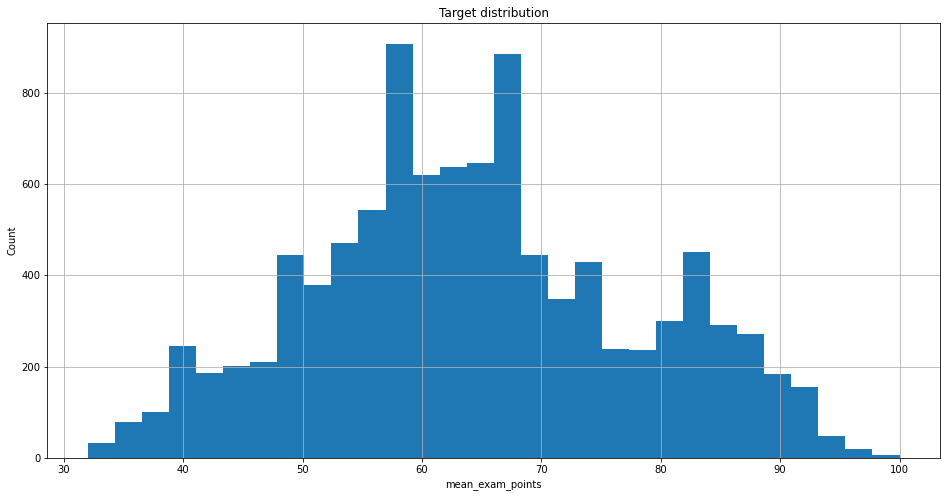

In [10]:
plt.figure(figsize = (16, 8))

train_df['mean_exam_points'].hist(bins=30)
plt.ylabel('Count')
plt.xlabel('mean_exam_points')

plt.title('Target distribution')
plt.show()

### Количественные переменные

In [11]:
train_df.describe()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,45.878000,1.986800,1699.105000,1.719500,0.375000,0.132900,0.109600,0.053700,0.032100,0.019400,64.340800
std,2886.89568,8.043929,1.772213,524.886654,0.792264,0.484147,0.339484,0.312406,0.225436,0.176274,0.137933,13.536823
min,0.00000,23.000000,0.000000,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000
25%,2499.75000,40.000000,0.000000,1300.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000
50%,4999.50000,46.000000,2.000000,1500.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000
75%,7499.25000,51.000000,3.000000,2150.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,73.000000
max,9999.00000,68.000000,10.000000,3950.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000


## 2. Обработка выбросов

### age

In [12]:
train_df['age'].value_counts()

48.0    495
45.0    490
46.0    485
44.0    484
47.0    468
42.0    460
49.0    453
43.0    449
50.0    437
41.0    412
52.0    410
51.0    405
40.0    397
53.0    339
39.0    333
54.0    293
38.0    285
37.0    258
55.0    245
36.0    243
56.0    221
57.0    190
35.0    186
34.0    181
58.0    168
33.0    159
59.0    135
60.0    104
32.0     99
31.0     84
61.0     84
62.0     72
30.0     56
29.0     55
28.0     51
63.0     50
23.0     39
68.0     38
64.0     37
27.0     34
65.0     31
26.0     26
25.0     17
66.0     17
67.0     16
24.0      9
Name: age, dtype: int64

### years_of_experience

In [13]:
train_df['years_of_experience'].value_counts()

0.0     2785
2.0     1804
1.0     1757
3.0     1572
4.0     1122
5.0      584
6.0      282
7.0       70
8.0       20
9.0        3
10.0       1
Name: years_of_experience, dtype: int64

### lesson_price

In [14]:
train_df['lesson_price'].value_counts()

1450.0    732
1500.0    699
1200.0    602
2200.0    543
1350.0    504
         ... 
3750.0      1
3950.0      1
300.0       1
400.0       1
3550.0      1
Name: lesson_price, Length: 74, dtype: int64

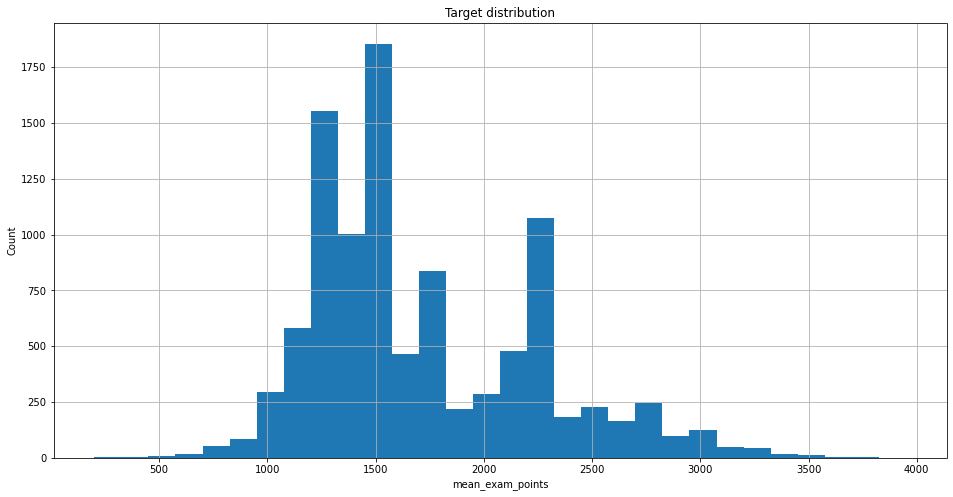

In [15]:
plt.figure(figsize = (16, 8))

train_df['lesson_price'].hist(bins=30)
plt.ylabel('Count')
plt.xlabel('mean_exam_points')

plt.title('Target distribution')
plt.show()

### qualification

In [16]:
train_df['qualification'].value_counts()

1.0    4884
2.0    3087
3.0    1979
4.0      50
Name: qualification, dtype: int64

### physics

In [17]:
train_df['physics'].value_counts()

0.0    6250
1.0    3750
Name: physics, dtype: int64

### chemistry

In [18]:
train_df['chemistry'].value_counts()

0.0    8671
1.0    1329
Name: chemistry, dtype: int64

### biology

In [19]:
train_df['biology'].value_counts()

0.0    8904
1.0    1096
Name: biology, dtype: int64

### english

In [20]:
train_df['english'].value_counts()

0.0    9463
1.0     537
Name: english, dtype: int64

### geography

In [21]:
train_df['geography'].value_counts()

0.0    9679
1.0     321
Name: geography, dtype: int64

### history

In [22]:
train_df['history'].value_counts()

0.0    9806
1.0     194
Name: history, dtype: int64

#### Выбросов нету.

## 3. Обработка пропусков

In [23]:
train_df.isna().sum()

Id                     0
age                    0
years_of_experience    0
lesson_price           0
qualification          0
physics                0
chemistry              0
biology                0
english                0
geography              0
history                0
mean_exam_points       0
dtype: int64

#### Пропусков нету.

## 4. Построение новых признаков

### sum_disciplines

In [24]:
train_df['sum_disciplines'] =  train_df[['physics', 'chemistry', 'biology', 'english', 'geography', 'history']].sum(axis=1)

In [25]:
train_df[['sum_disciplines']].head()

,sum_disciplines
0,2.0
1,1.0
2,0.0
3,0.0
4,0.0


### age_cat

In [26]:
train_df["age_cat"] = pd.cut(train_df["age"], [0, 30, 70], labels=[0, 30])

In [27]:
train_df[['age_cat']].head()

,age_cat
0,30
1,30
2,30
3,30
4,30


### start_experience

In [28]:
train_df['start_experience'] = train_df['age'] - train_df['years_of_experience']

In [29]:
train_df[['start_experience']].head()

,start_experience
0,40.0
1,44.0
2,39.0
3,41.0
4,42.0


### Target encoding 

#### qualification

In [30]:
mean_by_qualification = train_df.groupby(['qualification'], as_index=False).agg({'mean_exam_points':'mean'})\
                                            .rename(columns={'mean_exam_points':'mean_by_qualification'})

In [31]:
train_df = train_df.merge(mean_by_qualification, on=['qualification'], how='left')

In [32]:
train_df[['mean_by_qualification']].head()

,mean_by_qualification
0,55.919328
1,83.494189
2,55.919328
3,55.919328
4,55.919328


In [33]:
class FeatureGenetator():
    """Генерация новых признаков"""
    
    def __init__(self):
        
        self.mean_by_qualification = None

        
    def fit(self, X, y = None):
        
        X_cp = X.copy()
        
        X_cp['mean_exam_points'] = y.values
        
        if y is not None:
            self.mean_by_qualification = X_cp.groupby(['qualification'], as_index=False).agg({'mean_exam_points':'mean'})\
                                            .rename(columns={'mean_exam_points':'mean_by_qualification'}) 

    def transform(self, X):
        
        df = X.copy()
        
        df['sum_disciplines'] = df[['physics', 'chemistry', 'biology', 'english', 'geography', 'history']].sum(axis=1)
            
        df['age_cat'] = pd.cut(df["age"], [0, 30, 70], labels=[0, 30])
        
        df['start_experience'] = df['age'] - df['years_of_experience']
            
        if self.mean_by_qualification is not None:
            df = df.merge(self.mean_by_qualification, on=['qualification'], how='left')
            
        return df

## 5. Отбор признаков

In [34]:
train_df.columns.tolist()

['Id',
 'age',
 'years_of_experience',
 'lesson_price',
 'qualification',
 'physics',
 'chemistry',
 'biology',
 'english',
 'geography',
 'history',
 'mean_exam_points',
 'sum_disciplines',
 'age_cat',
 'start_experience',
 'mean_by_qualification']

In [35]:
feature_names = ['years_of_experience', 'lesson_price', 'qualification', 'physics', 'chemistry', 'biology', 'english']

new_feature_names = []

target_name = 'mean_exam_points'

In [36]:
train_df.isna().sum().sum()

0

## 6. Разбиение на train и test

In [37]:
train_df = pd.read_csv("train.csv")

X = train_df.drop(columns=target_name)
y = train_df[target_name]

In [38]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=12)

In [39]:
features_gen = FeatureGenetator()
features_gen.fit(X_train, y_train)
X_train = features_gen.transform(X_train)
X_valid = features_gen.transform(X_valid)

X_train.shape, X_valid.shape

((6700, 15), (3300, 15))

In [40]:
X_train = X_train[feature_names + new_feature_names]
X_valid = X_valid[feature_names + new_feature_names]

X_train.shape, X_valid.shape

((6700, 7), (3300, 7))

In [41]:
X_train.describe()

,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english
count,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000
mean,1.985224,1702.402985,1.723433,0.375522,0.131045,0.110000,0.054030
std,1.764774,524.854178,0.795618,0.484294,0.337475,0.312913,0.226093
min,0.000000,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1300.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1500.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,2150.000000,2.000000,1.000000,0.000000,0.000000,0.000000
max,9.000000,3950.000000,4.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
X_train.isna().sum().sum(), X_valid.isna().sum().sum()

(0, 0)

## 7. Построение модели

### Решающее дерево:

In [43]:
class DecisionTreeRegressor:
    
    
    def __init__(self, max_depth = None, max_features = None, min_samples_split = 2, 
                   min_samples_leaf = 1, random_state = 42, tree = None):
            self.max_depth = max_depth
            self.max_features = max_features
            self.min_samples_split = min_samples_split
            self.min_samples_leaf = min_samples_leaf
            self.random_state = random_state
            self.tree = tree
    
    
    # Реализуем класс узла
    
    class Node:
        def __init__(self, index, t, true_branch, false_branch):
            self.index = index  # индекс признака, по которому ведется сравнение с порогом в этом узле
            self.t = t  # значение порога
            self.true_branch = true_branch  # поддерево, удовлетворяющее условию в узле
            self.false_branch = false_branch  # поддерево, не удовлетворяющее условию в узле
    
    
    # Класс терминального узла (листа)
    
    class Leaf:
        def __init__(self, data, labels):
            self.data = data
            self.labels = labels
            self.prediction = np.mean(self.labels) 
            
            
    # Расчет дисперсии
    
    def dispersion(self, labels):
        return np.var(labels)
    
    
    # Расчет качества
    
    def quality(self, left_labels, right_labels, current_dispersion):
        
        # доля выбоки, ушедшая в левое поддерево
        p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])
        
        return current_dispersion - p * self.dispersion(left_labels) - (1 - p) * self.dispersion(right_labels)
    
    
    # Разбиение датасета в узле

    def split(self, data, labels, index, t):
        left = np.where(data[:, index] <= t)
        right = np.where(data[:, index] > t)
        
        true_data = data[left]
        false_data = data[right]
        true_labels = labels[left]
        false_labels = labels[right]
        
        return true_data, false_data, true_labels, false_labels    
    
    
    # Нахождение наилучшего разбиения
  
    def find_best_split(self, data, labels):
    
        #  обозначим минимальное количество объектов в узле
    
        current_dispersion = self.dispersion(labels)

        best_quality = 0
        best_t = None
        best_index = None
    
        if self.max_features is not None:
            np.random.seed(self.random_state)
            index_futures = np.random.randint(0, data.shape[1], self.max_features)
        else:
            index_futures = range(data.shape[1])
    
        for index in index_futures:
            # будем проверять только уникальные значения признака, исключая повторения
            t_values = np.unique([row[index] for row in data])
        
            for t in t_values:
                true_data, false_data, true_labels, false_labels = self.split(data, labels, index, t)
                #  пропускаем разбиения, в которых в узле остается менее min_samples_leaf объектов
                if len(true_data) < self.min_samples_leaf or len(false_data) < self.min_samples_leaf:
                    continue
            
                current_quality = self.quality(true_labels, false_labels, current_dispersion)
            
                #  выбираем порог, на котором получается максимальный прирост качества
                if current_quality > best_quality:
                    best_quality, best_t, best_index = current_quality, t, index

        return best_quality, best_t, best_index
    
    
    # Построение дерева с помощью рекурсивной функции

    def build_tree(self, data, labels, max_depth):
    
        #  Прекращаем рекурсию, когда достигнута глубина дерева max_depth
        if max_depth is not None:
            if max_depth == 0:
                return self.Leaf(data, labels)
            else:
                max_depth -= 1
    
        #  Прекращаем рекурсию, когда количество выборок для разбиения меньше min_samples_split
        if len(labels) < self.min_samples_split:
            return self.Leaf(data, labels)

        quality, t, index = self.find_best_split(data, labels)

        #  Базовый случай - прекращаем рекурсию, когда нет прироста в качества
        if quality == 0:
            return self.Leaf(data, labels)

        true_data, false_data, true_labels, false_labels = self.split(data, labels, index, t)

        # Рекурсивно строим два поддерева
        true_branch = self.build_tree(true_data, true_labels, max_depth)
        false_branch = self.build_tree(false_data, false_labels, max_depth)

        # Возвращаем класс узла со всеми поддеревьями, то есть целого дерева
        return self.Node(index, t, true_branch, false_branch)
    
    
    def classify_object(self, obj, node):

        #  Останавливаем рекурсию, если достигли листа
        if isinstance(node, self.Leaf):
            answer = node.prediction
            return answer
        if obj[node.index] <= node.t:
            return self.classify_object(obj, node.true_branch)
        else:
            return self.classify_object(obj, node.false_branch)
    
    
    def predict(self, data):
    
        classes = []
        for obj in np.array(data):
            prediction = self.classify_object(obj, self.tree)
            classes.append(prediction)
        return classes
    
    
    def fit(self, data, labels):
        self.tree = self.build_tree(np.array(data), np.array(labels), self.max_depth)

In [44]:
tree = DecisionTreeRegressor(max_depth = 6)

In [45]:
tree.fit(X_train, y_train)

Train R2:	0.785606383
Test R2:	0.7769693895


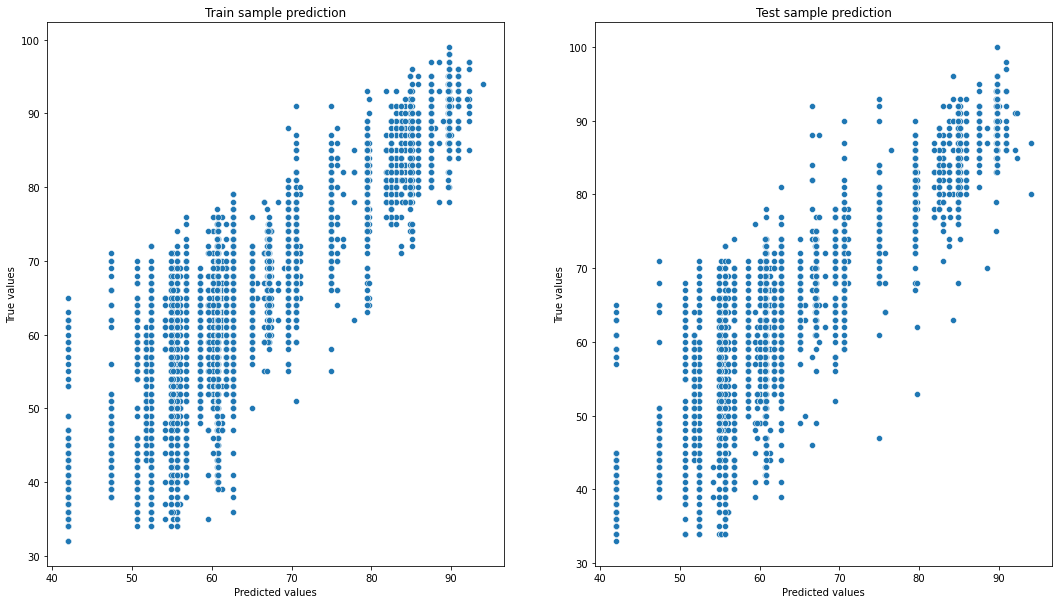

In [46]:
y_train_preds = tree.predict(X_train)
y_test_preds = tree.predict(X_valid)

evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)

### Бустинг:

In [47]:
class GradientBoostingRegressor:
    
    
    def __init__(self, n_trees = 40, max_depth = None, max_features = None, min_samples_split = 2, 
                 min_samples_leaf = 1, random_state = 42, eta = 0.1, part = 1, trees_list = []):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.max_features = max_features
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.random_state = random_state
        self.eta = eta
        self.part = part
        self.trees_list = trees_list.copy()
    
    
    def predict(self, X):
        
        X = np.array(X)
        # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
        # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
        return np.array([sum([self.eta * alg.predict([x])[0] for alg in self.trees_list]) for x in X])

    
    def bias(self, y, z):
        return (y - z)
    
    
    def fit(self, X, y):
        
        X = np.array(X)
        y = np.array(y)
        
        np.random.seed(self.random_state)
        
        for i in range(self.n_trees):
            tree = DecisionTreeRegressor(self.max_depth, self.max_features, self.min_samples_split, 
                                     self.min_samples_leaf, self.random_state)

            # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
            # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
            if len(self.trees_list) == 0:
                # обучаем первое дерево на обучающей выборке
                tree.fit(X, y)
            else:
                
                index = list(range(y_train.shape[0]))
                np.random.shuffle(index)
                index = index[:int(y_train.shape[0]*self.part)]
            
                # Получим ответы на текущей композиции
                target = self.predict([X[j] for j in index])
                
                # алгоритмы начиная со второго обучаем на сдвиг
                tree.fit([X[j] for j in index], self.bias([y[j] for j in index], target))
                
            self.trees_list.append(tree)

In [48]:
gb = GradientBoostingRegressor(n_trees = 100, max_depth = 5, eta = 0.1, part = 0.67)

In [49]:
gb.fit(X_train, y_train)

Train R2:	0.809527737
Test R2:	0.7819265715


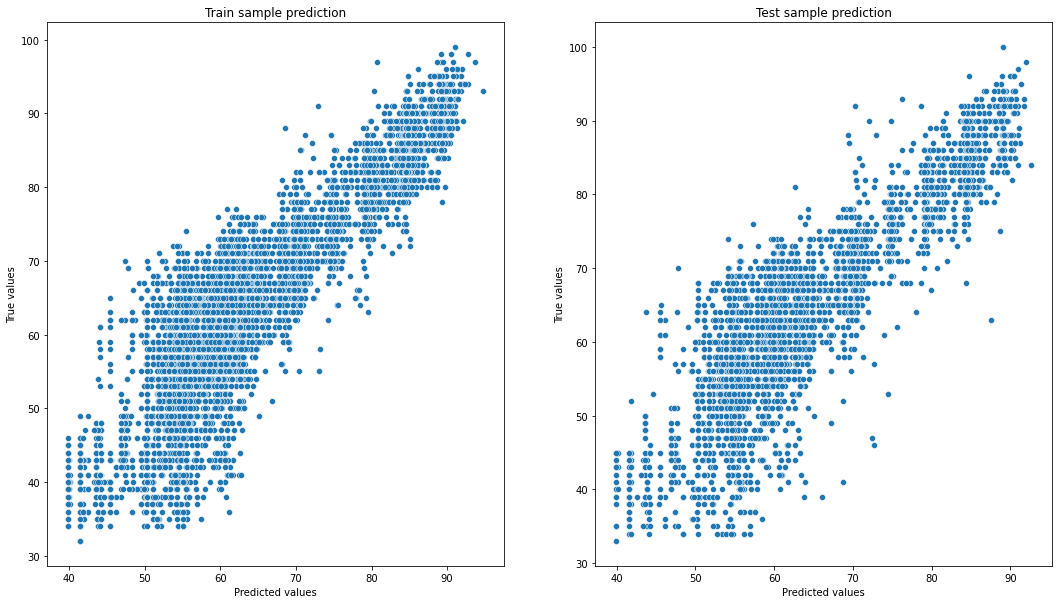

In [50]:
y_train_preds = gb.predict(X_train)
y_test_preds = gb.predict(X_valid)

evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)

### Бэггинг:

In [51]:
class BaggingRegressor:
    
    
    def __init__(self, base_estimator = DecisionTreeRegressor(), n_estimators = 10, random_state = 42, forest = []):
        self.base_estimator = base_estimator
        self.n_estimators = n_estimators
        self.random_state = random_state
        self.forest = forest.copy()
        
 
    def get_bootstrap(self, data, labels):
        
        np.random.seed(self.random_state)
        
        n_samples = data.shape[0]
        bootstrap = []
    
        for i in range(self.n_estimators):
            b_data = np.zeros(data.shape)
            b_labels = np.zeros(labels.shape)
            for j in range(n_samples):
                sample_index = np.random.randint(0, n_samples-1)
                b_data[j] = data[sample_index]
                b_labels[j] = labels[sample_index]            
            bootstrap.append((b_data, b_labels))
        
        return bootstrap
    
    
        # предсказание голосованием деревьев

    def predict(self, data):

        # добавим предсказания всех деревьев в список
        predictions = []
        for tree in self.forest:
            predictions.append(tree.predict(data))
    
        # сформируем список с предсказаниями для каждого объекта
        predictions_per_object = list(zip(*predictions))
    
        # выберем в качестве итогового предсказания для каждого объекта то,
        # за которое проголосовало большинство деревьев
        voted_predictions = []
        for obj in predictions_per_object:
            voted_predictions.append(np.mean(obj))
        
        return voted_predictions
    
    
    def fit(self, data, labels):
        
        data = np.array(data)
        labels = np.array(labels)
        
        bootstrap = self.get_bootstrap(data, labels)
        
        for b_data, b_labels in bootstrap:
            tree = type(self.base_estimator)(**self.base_estimator.__dict__)
            tree.fit(b_data, b_labels)
            self.forest.append(tree)

#### Бэггинг над решающем деревом (случайный лес):

In [52]:
tree = DecisionTreeRegressor(max_depth = 7)

In [53]:
bag = BaggingRegressor(base_estimator = tree, n_estimators = 50)

In [54]:
bag.fit(X_train, y_train)

Train R2:	0.8002654424
Test R2:	0.7836380281


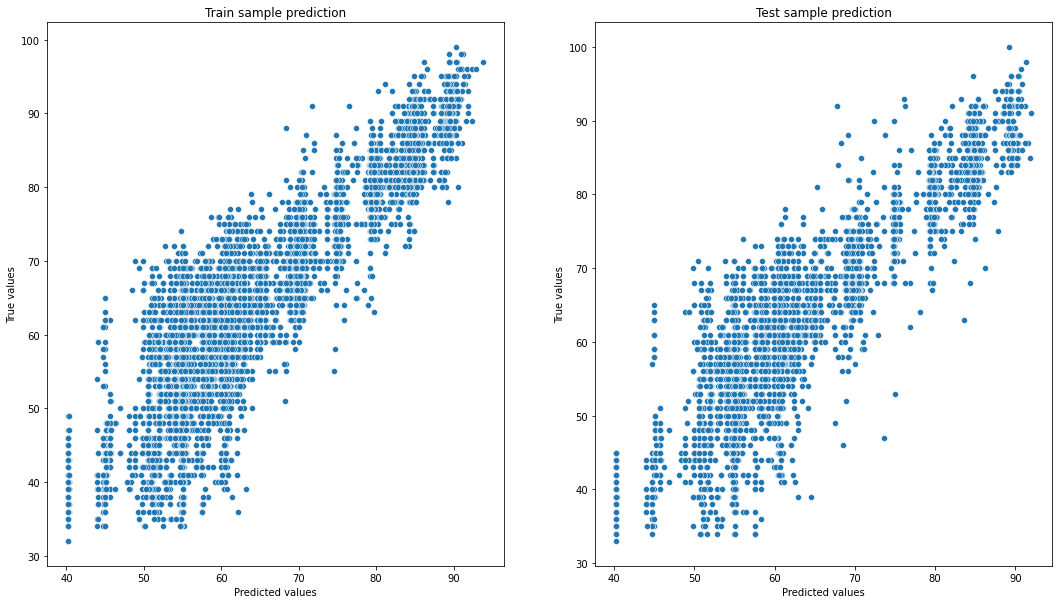

In [55]:
y_train_preds = bag.predict(X_train)
y_test_preds = bag.predict(X_valid)

evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)

#### Бэггинг над бустингом:

In [56]:
gb = GradientBoostingRegressor(n_trees = 10, max_depth = 5, eta = 0.4, part = 1)

In [57]:
bag = BaggingRegressor(base_estimator = gb, n_estimators = 10)

In [58]:
bag.fit(X_train, y_train)

Train R2:	0.7940187983
Test R2:	0.7817700048


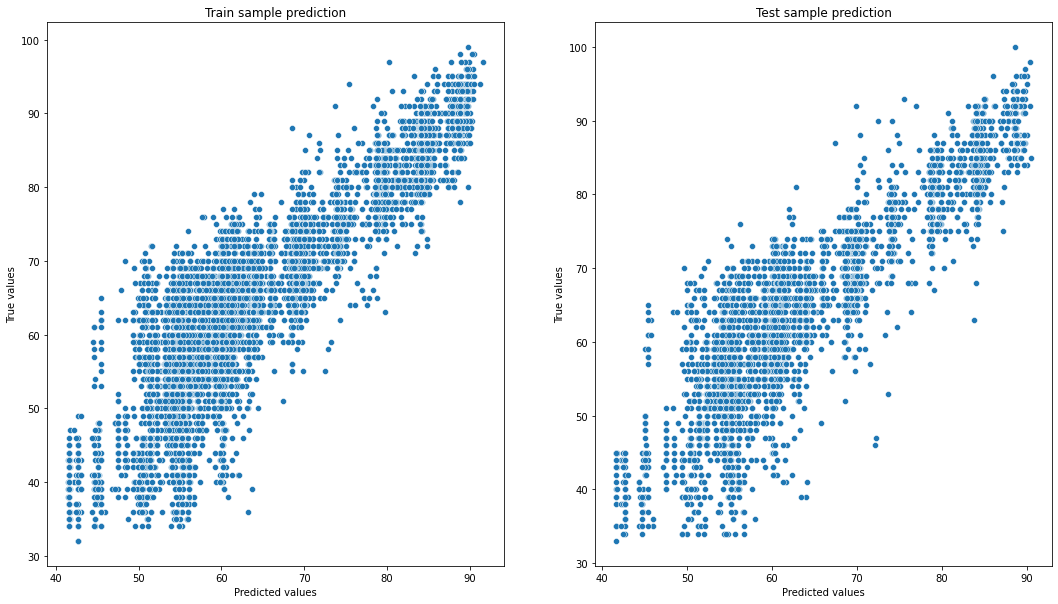

In [59]:
y_train_preds = bag.predict(X_train)
y_test_preds = bag.predict(X_valid)

evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)

## 8. Прогнозирование на тестовом датасете

### Максимальное бучение на всех данных лучшей моделью

In [60]:
test_df = pd.read_csv("test.csv")
test_df.describe()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000
mean,14999.50000,45.97280,1.980000,1697.095000,1.709400,0.38130,0.123500,0.120100,0.056000,0.031400,0.0184
std,2886.89568,7.95628,1.783289,524.262621,0.793483,0.48573,0.329027,0.325095,0.229933,0.174405,0.1344
min,10000.00000,23.00000,0.000000,200.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000
25%,12499.75000,41.00000,0.000000,1300.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000
50%,14999.50000,46.00000,2.000000,1500.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000
75%,17499.25000,51.00000,3.000000,2150.000000,2.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.0000
max,19999.00000,68.00000,10.000000,4050.000000,4.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.0000


In [61]:
features_gen = FeatureGenetator()
features_gen.fit(X, y)
X = features_gen.transform(X)
test_df = features_gen.transform(test_df)

X.shape, test_df.shape

((10000, 15), (10000, 15))

In [62]:
X = X[feature_names + new_feature_names]
test_df = test_df[feature_names + new_feature_names]

X.shape, test_df.shape

((10000, 7), (10000, 7))

In [63]:
X.isna().sum().sum(), test_df.isna().sum().sum()

(0, 0)

In [64]:
X.describe()

,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.986800,1699.105000,1.719500,0.375000,0.132900,0.109600,0.053700
std,1.772213,524.886654,0.792264,0.484147,0.339484,0.312406,0.225436
min,0.000000,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1300.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1500.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,2150.000000,2.000000,1.000000,0.000000,0.000000,0.000000
max,10.000000,3950.000000,4.000000,1.000000,1.000000,1.000000,1.000000


In [65]:
tree = DecisionTreeRegressor(max_depth = 7)

In [66]:
bag = BaggingRegressor(base_estimator = tree, n_estimators = 70)

In [67]:
bag.fit(X, y)

### Прогнозирование

In [68]:
submit = pd.read_csv('submission_example.csv')
submit.head()

,Id,mean_exam_points
0,10000,50.0
1,10001,50.0
2,10002,50.0
3,10003,50.0
4,10004,50.0


In [69]:
predictions = bag.predict(test_df)
predictions

[54.87424891541655,
 63.32687339437919,
 47.9283591478223,
 90.74636812678936,
 89.45849983448078,
 63.85874897587181,
 40.26778593920688,
 53.681678367129415,
 57.105574173688964,
 79.43513905387931,
 52.38787870950314,
 61.561826823068145,
 51.301108163167584,
 84.93243978781173,
 65.12521350980744,
 62.30818438191761,
 92.92570646266626,
 55.14630585942364,
 54.37976985374785,
 54.72636113126597,
 79.36397941230676,
 61.072894767189574,
 66.77884182842787,
 63.85874897587181,
 54.7515142636865,
 82.96446104593068,
 59.239776935726276,
 53.681678367129415,
 59.65427993043825,
 54.616233155008686,
 70.64817664243212,
 56.96831351555664,
 45.38662297479793,
 52.38787870950314,
 47.63338626400905,
 70.33110679330777,
 54.70940248820318,
 75.63925309729554,
 59.440238576035334,
 90.1872572630496,
 90.37319095337983,
 62.263278291733165,
 60.568413630602315,
 65.57887972456948,
 60.2173186215443,
 51.09416946928209,
 47.63338626400905,
 45.08643299787093,
 60.55661789333855,
 84.932439787

In [70]:
submit['mean_exam_points'] = predictions
submit.head()

,Id,mean_exam_points
0,10000,54.874249
1,10001,63.326873
2,10002,47.928359
3,10003,90.746368
4,10004,89.458500


In [71]:
submit.to_csv('bag_xgb_submit.csv', index=False)